<a href="https://colab.research.google.com/github/Charan-Repala/CheRRy/blob/main/WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#NaiveBayes Project (Weather Prediction)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading CSV files
df=pd.read_csv('combined_data.csv')
df

,Serial Number,Outlook,Temperature,Windy,Humidity,precipitation,temp_max,temp_min,wind
0,1,Sunny,Hot,False,Normal,0.000000,12.800000,5.000000,4.700000
1,2,Overcast,Mild,True,Normal,10.900000,10.600000,2.800000,4.500000
2,3,Rainy,Cool,False,High,0.800000,11.700000,7.200000,2.300000
3,4,Sunny,Mild,False,Normal,20.300000,12.200000,5.600000,4.700000
4,5,Overcast,Cool,True,High,1.300000,8.900000,2.800000,6.100000
...,...,...,...,...,...,...,...,...,...
6595,6596,Overcast,Mild,True,Normal,13.239232,13.374900,-0.467947,3.751837
6596,6597,Sunny,Mild,False,Normal,-2.867755,9.463365,11.079169,4.684747
6597,6598,Sunny,Hot,False,Normal,23.083243,4.171448,-0.809784,5.792489
6598,6599,Rainy,Hot,True,High,18.202636,15.456031,-1.235799,6.945609


In [4]:
# Define the condition
condition = (df['Outlook'] == 'Sunny') & (df['Temperature'] == 'Hot')

# Create the 'Play' column based on the condition
df['Play'] = 'Yes'
df.loc[~condition, 'Play'] = 'No'

# Save the DataFrame back to a CSV file
df.to_csv("output_file.csv", index=False)


In [5]:
df

,Serial Number,Outlook,Temperature,Windy,Humidity,precipitation,temp_max,temp_min,wind,Play
0,1,Sunny,Hot,False,Normal,0.000000,12.800000,5.000000,4.700000,Yes
1,2,Overcast,Mild,True,Normal,10.900000,10.600000,2.800000,4.500000,No
2,3,Rainy,Cool,False,High,0.800000,11.700000,7.200000,2.300000,No
3,4,Sunny,Mild,False,Normal,20.300000,12.200000,5.600000,4.700000,No
4,5,Overcast,Cool,True,High,1.300000,8.900000,2.800000,6.100000,No
...,...,...,...,...,...,...,...,...,...,...
6595,6596,Overcast,Mild,True,Normal,13.239232,13.374900,-0.467947,3.751837,No
6596,6597,Sunny,Mild,False,Normal,-2.867755,9.463365,11.079169,4.684747,No
6597,6598,Sunny,Hot,False,Normal,23.083243,4.171448,-0.809784,5.792489,Yes
6598,6599,Rainy,Hot,True,High,18.202636,15.456031,-1.235799,6.945609,No


In [6]:
#Encoding the string to Numericals
Numerics=LabelEncoder()

In [7]:
#Dropping the target vaiable and make it as a newframe
df=df.drop('Serial Number',axis='columns')

In [8]:
df

,Outlook,Temperature,Windy,Humidity,precipitation,temp_max,temp_min,wind,Play
0,Sunny,Hot,False,Normal,0.000000,12.800000,5.000000,4.700000,Yes
1,Overcast,Mild,True,Normal,10.900000,10.600000,2.800000,4.500000,No
2,Rainy,Cool,False,High,0.800000,11.700000,7.200000,2.300000,No
3,Sunny,Mild,False,Normal,20.300000,12.200000,5.600000,4.700000,No
4,Overcast,Cool,True,High,1.300000,8.900000,2.800000,6.100000,No
...,...,...,...,...,...,...,...,...,...
6595,Overcast,Mild,True,Normal,13.239232,13.374900,-0.467947,3.751837,No
6596,Sunny,Mild,False,Normal,-2.867755,9.463365,11.079169,4.684747,No
6597,Sunny,Hot,False,Normal,23.083243,4.171448,-0.809784,5.792489,Yes
6598,Rainy,Hot,True,High,18.202636,15.456031,-1.235799,6.945609,No


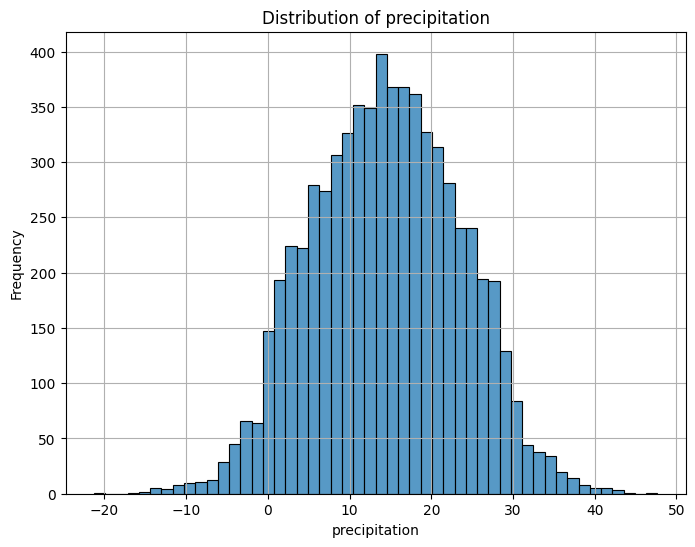

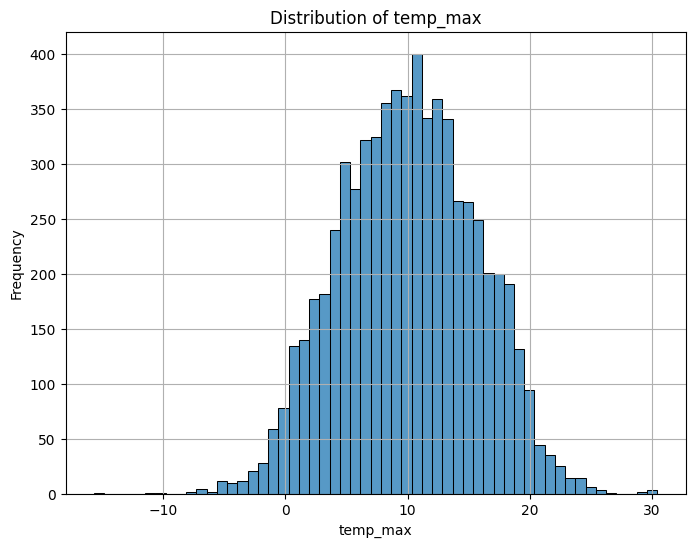

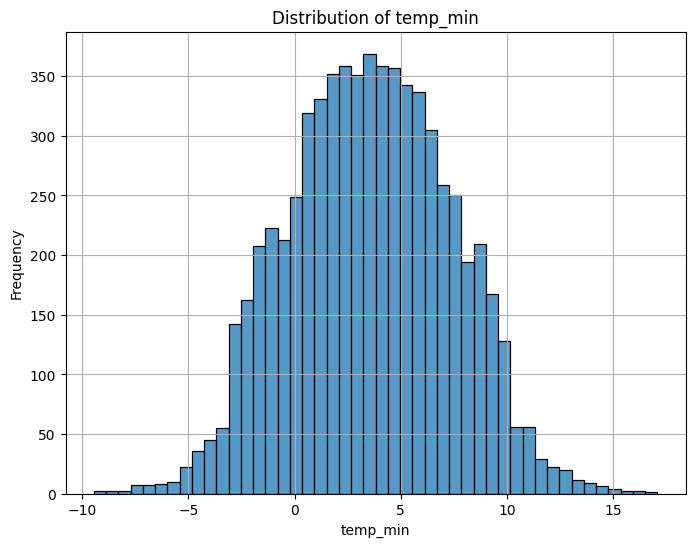

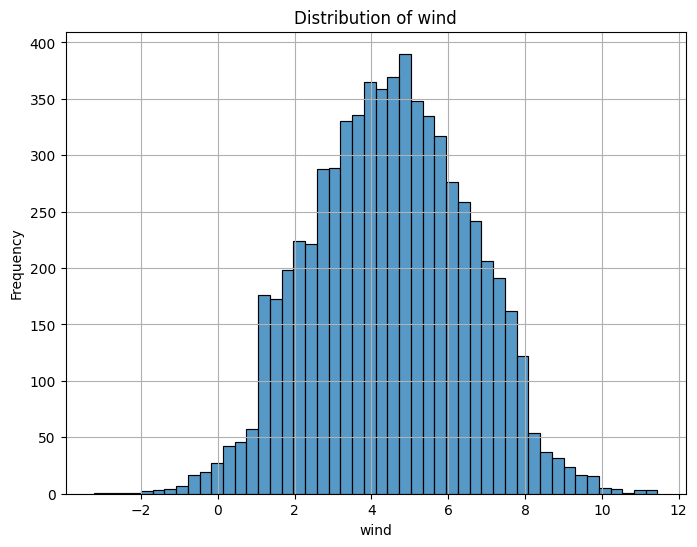

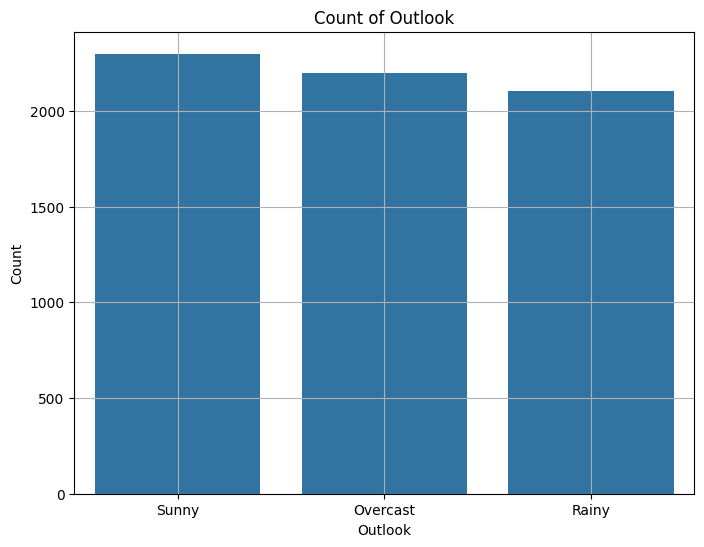

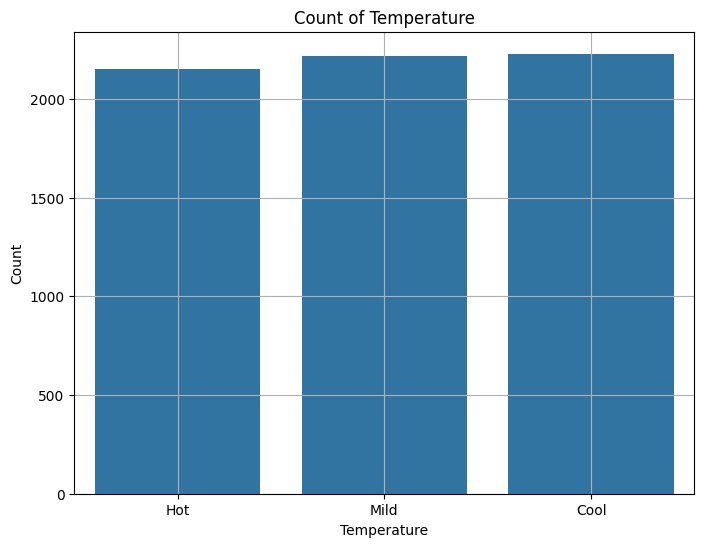

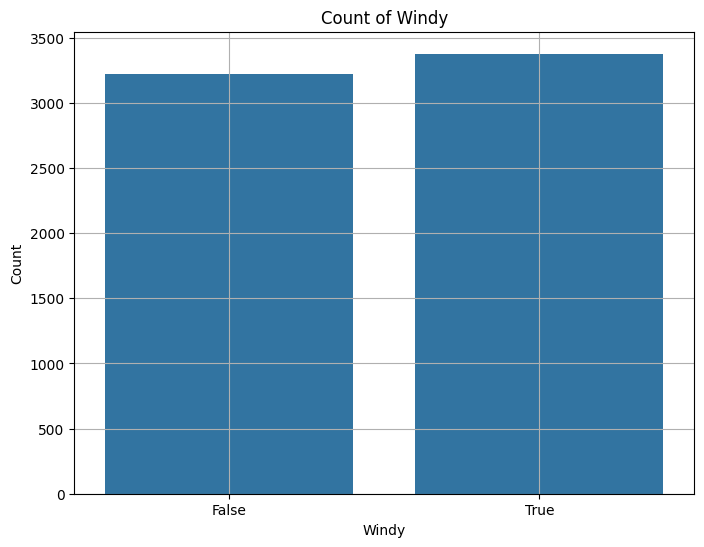

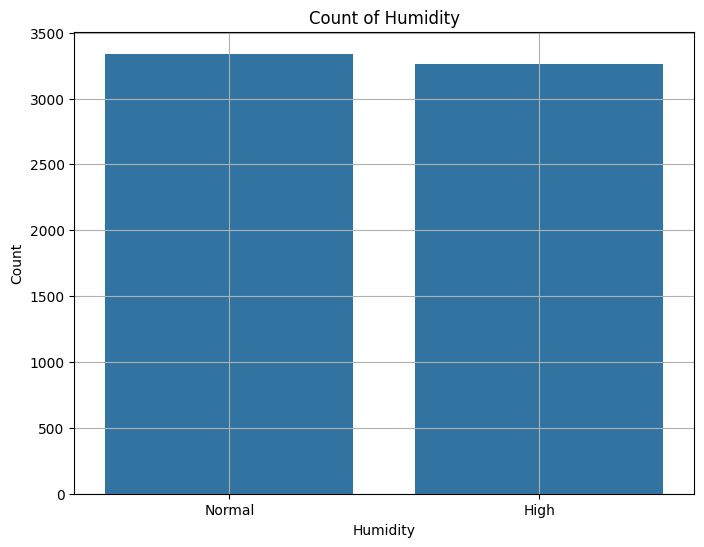

In [9]:
numeric_features = ['precipitation', 'temp_max', 'temp_min', 'wind']
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot the count of each category in categorical features
categorical_features = ['Outlook', 'Temperature', 'Windy', 'Humidity']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


In [10]:
#Dropping the target vaiable and make it as a newframe
inputs=df.drop('Play',axis='columns')
target=df['Play']
target

0       Yes
1        No
2        No
3        No
4        No
       ... 
6595     No
6596     No
6597    Yes
6598     No
6599     No
Name: Play, Length: 6600, dtype: object

In [10]:
df

,Outlook,Temperature,Windy,Humidity,precipitation,temp_max,temp_min,wind,Play
0,Sunny,Hot,False,Normal,0.000000,12.800000,5.000000,4.700000,Yes
1,Overcast,Mild,True,Normal,10.900000,10.600000,2.800000,4.500000,No
2,Rainy,Cool,False,High,0.800000,11.700000,7.200000,2.300000,No
3,Sunny,Mild,False,Normal,20.300000,12.200000,5.600000,4.700000,No
4,Overcast,Cool,True,High,1.300000,8.900000,2.800000,6.100000,No
...,...,...,...,...,...,...,...,...,...
6595,Overcast,Mild,True,Normal,13.239232,13.374900,-0.467947,3.751837,No
6596,Sunny,Mild,False,Normal,-2.867755,9.463365,11.079169,4.684747,No
6597,Sunny,Hot,False,Normal,23.083243,4.171448,-0.809784,5.792489,Yes
6598,Rainy,Hot,True,High,18.202636,15.456031,-1.235799,6.945609,No


In [11]:
#Creating a new dataframe
inputs['outlook_n']=Numerics.fit_transform(inputs['Outlook'])
inputs['Temp_n']=Numerics.fit_transform(inputs['Temperature'])
inputs['Humidity_n']=Numerics.fit_transform(inputs['Humidity'])
inputs['windy_n']=Numerics.fit_transform(inputs['Windy'])
inputs
df=inputs

In [12]:
#Dropping the string values
inputs_n=inputs.drop(['Outlook','Temperature','Humidity','Windy','precipitation','temp_max','temp_min','wind'],axis='columns')
inputs_n

,outlook_n,Temp_n,Humidity_n,windy_n
0,2,1,1,0
1,0,2,1,1
2,1,0,0,0
3,2,2,1,0
4,0,0,0,1
...,...,...,...,...
6595,0,2,1,1
6596,2,2,1,0
6597,2,1,1,0
6598,1,1,0,1


In [13]:
#Applying the Gaussian naivebayes
Classifier=GaussianNB()
Classifier.fit(inputs_n,target)

GaussianNB()

In [14]:
#85% accuracy
Classifier.score(inputs_n,target)

1.0

In [15]:
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(Classifier, f)

In [16]:
#Prediction
Classifier.predict([[2,1,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Yes'], dtype='<U3')

In [17]:
#Prediction
Classifier.predict([[0,1,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

In [18]:
df

,Outlook,Temperature,Windy,Humidity,precipitation,temp_max,temp_min,wind,outlook_n,Temp_n,Humidity_n,windy_n
0,Sunny,Hot,False,Normal,0.000000,12.800000,5.000000,4.700000,2,1,1,0
1,Overcast,Mild,True,Normal,10.900000,10.600000,2.800000,4.500000,0,2,1,1
2,Rainy,Cool,False,High,0.800000,11.700000,7.200000,2.300000,1,0,0,0
3,Sunny,Mild,False,Normal,20.300000,12.200000,5.600000,4.700000,2,2,1,0
4,Overcast,Cool,True,High,1.300000,8.900000,2.800000,6.100000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6595,Overcast,Mild,True,Normal,13.239232,13.374900,-0.467947,3.751837,0,2,1,1
6596,Sunny,Mild,False,Normal,-2.867755,9.463365,11.079169,4.684747,2,2,1,0
6597,Sunny,Hot,False,Normal,23.083243,4.171448,-0.809784,5.792489,2,1,1,0
6598,Rainy,Hot,True,High,18.202636,15.456031,-1.235799,6.945609,1,1,0,1


In [19]:
# Define a function to predict the values
def predict_weather(on, tn, wn, hn):
    # Filter the dataframe based on input features
    filtered_df = df[(df['outlook_n'] == on) & (df['Temp_n'] == tn) & (df['windy_n'] == wn) & (df['Humidity_n'] == hn)]

    # Take the average of the filtered values to predict
    prediction = {
        'temp_max': filtered_df['temp_max'].mean(),
        'temp_min': filtered_df['temp_min'].mean(),
        'precipitation': filtered_df['precipitation'].mean(),
        'wind': filtered_df['wind'].mean()
    }

    return prediction

predicted_values = predict_weather(0,2,0,1)
predicted_values

{'temp_max': 9.19683313317416,
 'temp_min': 3.815492022808989,
 'precipitation': 15.082199052505617,
 'wind': 4.421120851730337}